SDXL-Turbo is a fast generative text-to-image model that can synthesize photorealistic
images from a text prompt in a single network evaluation.
A real-time demo is available here: http://clipdrop.co/stable-diffusion-turbo.
Developed and funded by Stability AI, SDXL-Turbo stands out as a distilled version of the powerful SDXL 1.0.
It's built on the innovative Adversarial Diffusion Distillation method,
ensuring high-quality images even with minimal sampling steps.
Join me as I dive into this incredible technology and explore its capabilities.
 For more details visit. https://huggingface.co/stabilityai/sdxl-turbo

In [2]:
!pip install diffusers transformers accelerate --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 36.0 MB/s eta 0:00:00


In [3]:
from diffusers import AutoPipelineForText2Image
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [4]:
pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo",
                                                 torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.24.0",
  "_name_or_path": "stabilityai/sdxl-turbo",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [5]:
pipe

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.24.0",
  "_name_or_path": "stabilityai/sdxl-turbo",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 674 ms, sys: 5.87 ms, total: 680 ms
Wall time: 691 ms


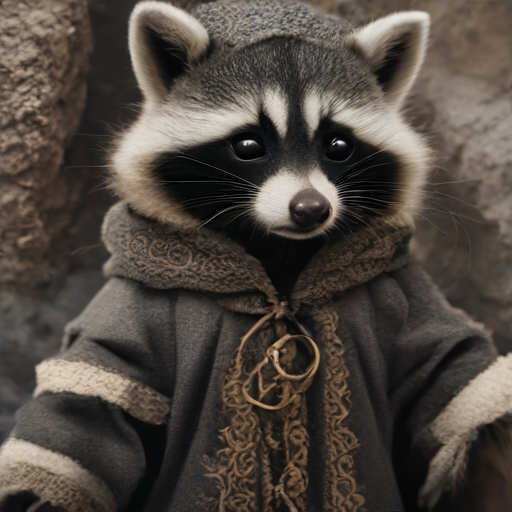

In [7]:
%%time
prompt = "A cinematic shot of a baby racoon wearing an intricate italian priest robe."

image = pipe(
             prompt=prompt,
             num_inference_steps=1,
             guidance_scale=0.0
             ).images[0]
image

In [8]:
image.save("racon.png")

  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 678 ms, sys: 10.4 ms, total: 688 ms
Wall time: 768 ms


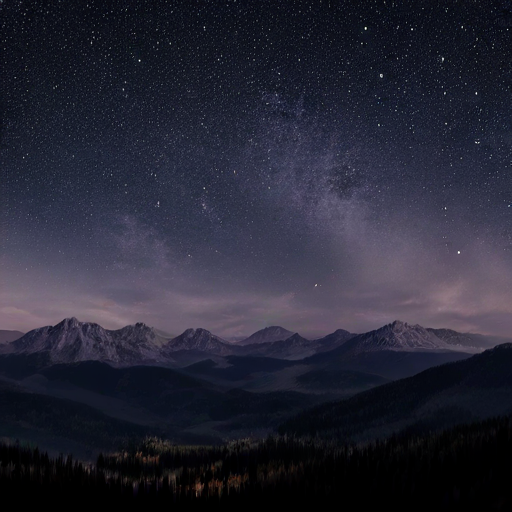

In [9]:
%%time
prompt = "Scenic mountain view in night sky."

image = pipe(
             prompt=prompt,
             num_inference_steps=1,
             guidance_scale=0.0
             ).images[0]
image

  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 671 ms, sys: 14.8 ms, total: 686 ms
Wall time: 697 ms


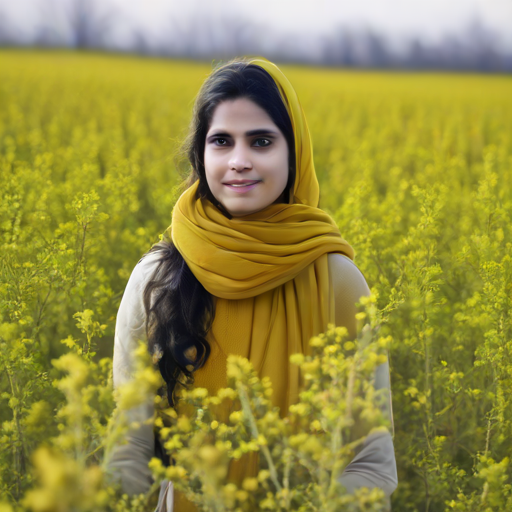

In [10]:
%%time
prompt = "Pakistani girl in mustard field in winter times,clear suny day"

image = pipe(
             prompt=prompt,
             num_inference_steps=1,
             guidance_scale=0.0
             ).images[0]
image

  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 688 ms, sys: 3.82 ms, total: 691 ms
Wall time: 723 ms


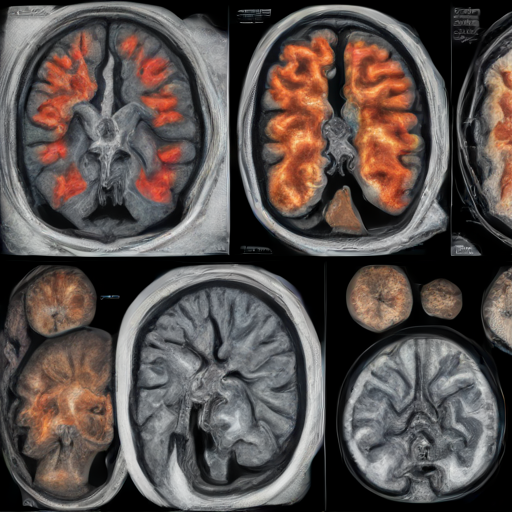

In [11]:
%%time
prompt = "MRI images of brain which clearly segment tumors"

image = pipe(
             prompt=prompt,
             num_inference_steps=1,
             guidance_scale=0.0
             ).images[0]
image

  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 693 ms, sys: 8.25 ms, total: 701 ms
Wall time: 707 ms


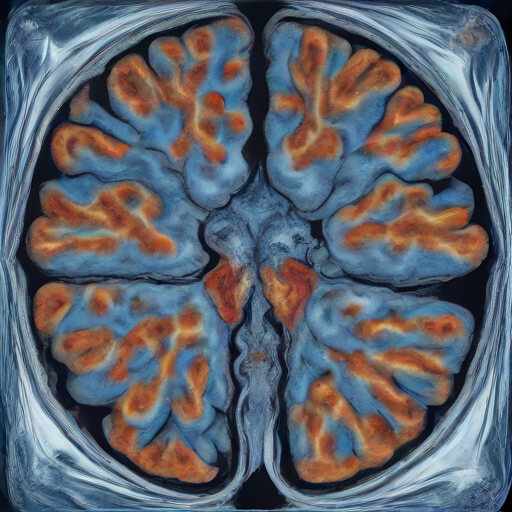

In [12]:
%%time
prompt = "MRI image of brain,with semantic and instance segmentation of tumors"

image = pipe(
             prompt=prompt,
             num_inference_steps=1,
             guidance_scale=0.0
             ).images[0]
image

  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 662 ms, sys: 1.27 ms, total: 663 ms
Wall time: 682 ms


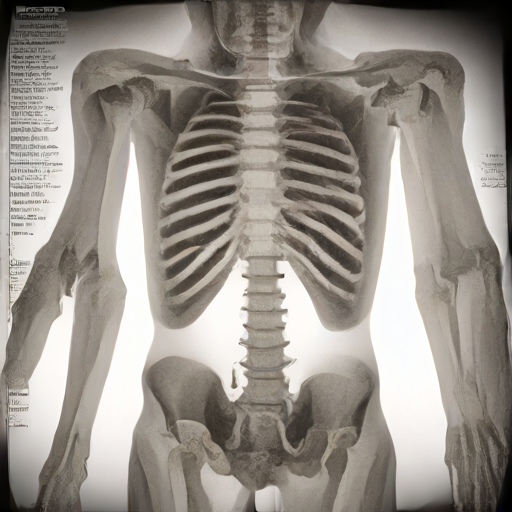

In [13]:
%%time
prompt = "X-ray image of whole body,where fracture in bone clearly showned"

image = pipe(
             prompt=prompt,
             num_inference_steps=1,
             guidance_scale=0.0
             ).images[0]
image

  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 696 ms, sys: 0 ns, total: 696 ms
Wall time: 800 ms


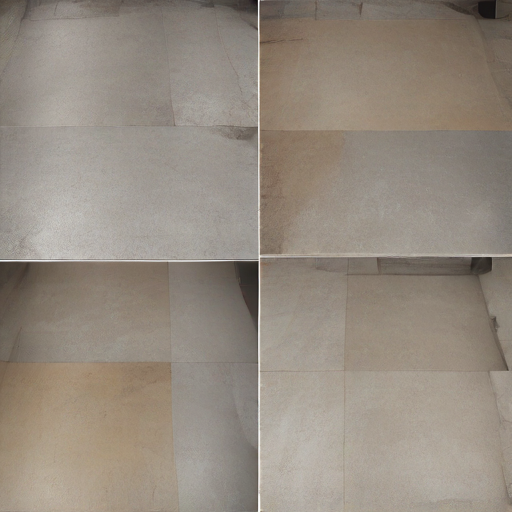

In [14]:
%%time
prompt = "Different images of floor where any defect is recognized,provide me this image of defected part in rectangular boxes"

image = pipe(
             prompt=prompt,
             num_inference_steps=1,
             guidance_scale=0.0
             ).images[0]
image